# **NEURAL NETWORK MULTICLASS CLASSIFICATION**

## - **IMPORTING LIBRARIRES**

In [62]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import helper_function as plot

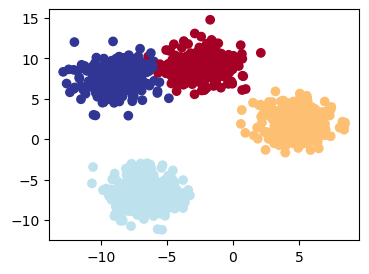

In [48]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# $create multiclass dataset
xblob, yblob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED,
)


# $turn data into tensors
xblob = torch.from_numpy(xblob).type(torch.float)
yblob = torch.from_numpy(yblob).type(torch.LongTensor)

# $train test split
xtrain, xtest, ytrain, ytest = train_test_split(
    xblob, yblob, test_size=0.2, random_state=RANDOM_SEED
)

# $plot data
plt.figure(figsize=(4,3))
plt.scatter(xblob[:, 0], xblob[:, 1], c=yblob, cmap=plt.cm.RdYlBu)

## **CREATING DEVICE AGNOSTIC CODE**

In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## **MODEL BUILDING (MULTICLASS)**

### *Building model architecture and instantiating*

In [51]:
class BlobModel(nn.Module):
    def __init__(self, input_feature: int, output_feature: int, hidden_units: int = 8):
        """Initializes the multiclass classification model

        Args:
            input_feature (int): INPUT FEATURES
            output_feature (int): OUTPUT FEATURES
            hidden_units (int, optional): number of hidden units. Defaults to 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feature, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_feature),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)


model = BlobModel(2, 4, 8)

In [52]:
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### *Setting up loss function and optimiser*

In [53]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

### *model training*

In [54]:
# evaluation metrics
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100

In [57]:
epochs = 100

epoch_val = []
train_loss_val = []
test_loss_val = []
train_accuracy_val =[]
test_accuracy_val =[]


xtrain, xtest, ytrain, ytest = xtrain.to(device), xtest.to(device), ytrain.to(device), ytest.to(device) 
model.to(device)

for epoch in range(epochs):
    model.train()
    trainlogits = model(xtrain)
    trainpred = torch.softmax(trainlogits,dim=1).argmax(dim=1)
    trainloss = loss_fn(trainlogits,ytrain)
    trainacc = accuracy_fn(ytrain,trainpred)
    optimizer.zero_grad()
    trainloss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        testlogits = model(xtest)
        testpred = torch.softmax(testlogits, dim = 1).argmax(dim = 1)
        testloss = loss_fn(testlogits,ytest)
        testacc = accuracy_fn(y_pred=testpred,y_true=ytest)
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Train loss: {trainloss} | Train Accuracy: {trainacc} | Test Loss: {testloss} | Test Accuracy: {testacc}')
        epoch_val.append(epoch)
        train_loss_val.append(trainloss)
        test_loss_val.append(testloss)
        train_accuracy_val.append(trainacc)
        test_accuracy_val.append(testacc)

Epoch: 0 | Train loss: 1.0694811344146729 | Train Accuracy: 50.0 | Test Loss: 0.9112738966941833 | Test Accuracy: 70.5
Epoch: 10 | Train loss: 0.21937942504882812 | Train Accuracy: 94.0 | Test Loss: 0.1734936386346817 | Test Accuracy: 100.0
Epoch: 20 | Train loss: 0.03288361057639122 | Train Accuracy: 99.25 | Test Loss: 0.01995929889380932 | Test Accuracy: 99.5
Epoch: 30 | Train loss: 0.021081209182739258 | Train Accuracy: 99.5 | Test Loss: 0.00917046144604683 | Test Accuracy: 99.5
Epoch: 40 | Train loss: 0.021449735388159752 | Train Accuracy: 99.5 | Test Loss: 0.0030980384908616543 | Test Accuracy: 100.0
Epoch: 50 | Train loss: 0.020259875804185867 | Train Accuracy: 99.5 | Test Loss: 0.004850816912949085 | Test Accuracy: 99.5
Epoch: 60 | Train loss: 0.018574001267552376 | Train Accuracy: 99.375 | Test Loss: 0.003659407841041684 | Test Accuracy: 100.0
Epoch: 70 | Train loss: 0.017525799572467804 | Train Accuracy: 99.375 | Test Loss: 0.004156008828431368 | Test Accuracy: 100.0
Epoch: 80

### *Visualisation*

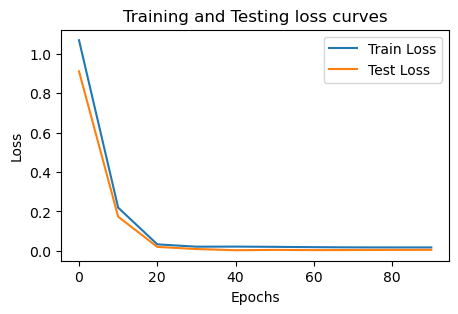

In [60]:
plt.figure(figsize=(5,3))
plt.plot(
    epoch_val, np.array(torch.tensor(train_loss_val).numpy()), label="Train Loss"
)
plt.plot(
    epoch_val, np.array(torch.tensor(test_loss_val).numpy()), label="Test Loss"
)
plt.title("Training and Testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

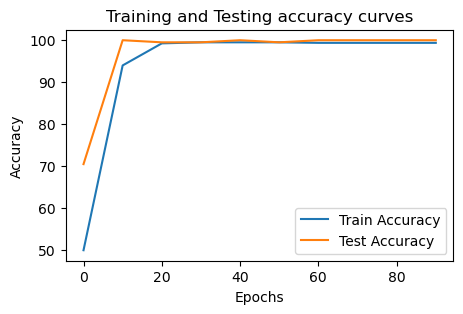

In [61]:
plt.figure(figsize=(5, 3))
plt.plot(epoch_val, np.array(torch.tensor(train_accuracy_val).numpy()), label="Train Accuracy")
plt.plot(epoch_val, np.array(torch.tensor(test_accuracy_val).numpy()), label="Test Accuracy")
plt.title("Training and Testing accuracy curves")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

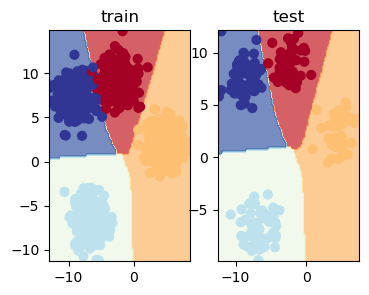

In [63]:
plt.figure(figsize=(4,3))
plt.subplot(1, 2, 1)
plt.title("train")
plot.plot_decision_boundary(model, xtrain, ytrain)

plt.subplot(1, 2, 2)
plt.title("test")
plot.plot_decision_boundary(model, xtest, ytest)

### *Model evaluation*


* Accuracy
* precision
* Recall
* F1- score
* Confusion Matrix
* Classification report

In [68]:
model.to(device)
model.eval()
with torch.inference_mode():
    ylogits = model(xtest)
    
ylogits[:10]

tensor([[ -5.0945,  27.2611,   0.6439, -22.5844],
        [  1.6894, -34.1351, -18.4035,  10.7601],
        [-31.7451,  20.4681,  38.1346, -21.0754],
        [ -4.3141,  24.1852,   0.4021, -20.1769],
        [  9.7400, -14.1610, -22.2860,  -0.3271],
        [  0.0550, -42.5006, -19.8188,  14.5765],
        [-30.7445,  20.0958,  36.9997, -20.6630],
        [  9.8935, -14.4135, -22.6838,  -0.3085],
        [-37.3248,  13.9020,  43.6315, -16.8878],
        [  9.6680, -14.0426, -22.0993,  -0.3358]], device='cuda:0')

In [71]:
ypred = torch.argmax(torch.softmax(ylogits,dim=1),dim=1)
ypred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [81]:
from torchmetrics import Accuracy, Precision, Recall, ConfusionMatrix

accuracy = Accuracy(task="multiclass", num_classes=4)
precision = Precision(task='multiclass',num_classes=4)
recall = Recall(task="multiclass",num_classes=4)
print(f'Accuracy of the model : {accuracy(ypred.cpu(),ytest.cpu())}\nPrecison: {precision(ytest.cpu(),ypred.cpu())}\nRecall: {recall(ytest.cpu(),ypred.cpu())}')

Accuracy of the model : 1.0
Precison: 1.0
Recall: 1.0


In [82]:
confmat = ConfusionMatrix('multiclass',num_classes=4)
confmat(ypred.cpu(),ytest.cpu())

tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 0,  0,  0, 57]])

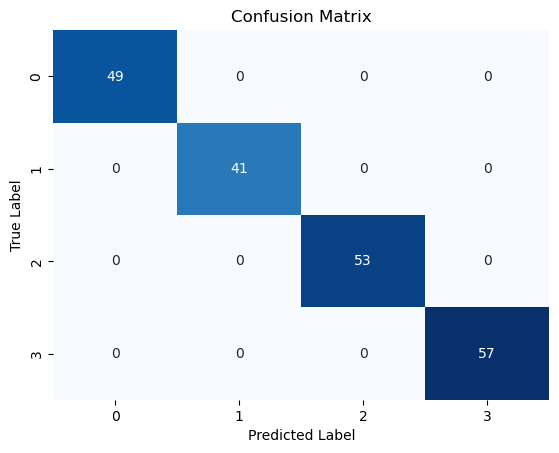

In [83]:
import seaborn as sns
sns.heatmap(
    confmat(ypred.cpu(), ytest.cpu()), annot=True, fmt="d", cmap="Blues", cbar=False
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()